En este notebook, lo que hago es empezar a entrenar un RandomForestClassifier con los mejores hiperparametros obtenidos (segun el accuracy) en la etapa de validation.

In [2]:
import sys
sys.path.append('..')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scripts.main import load_dataset, train_test_division
from sklearn.model_selection import train_test_split

In [4]:
df = load_dataset('../datasets/train-limpio.csv')
df.head()

load_dataset: 00:00:00.022



,Survived,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0.0,22.0,1.0,0.0,7.2500,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
x, y = df.drop('Survived', axis = 1), df.Survived

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

params = '{"n_estimators":40,"criterion":"gini","max_depth":17,"min_samples_split":2,"min_samples_leaf":2}'

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import json
json_params = json.loads(params)
rf = RandomForestClassifier(**json_params, random_state=123).fit(x_train, y_train)
y_pred = rf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.8153846153846154


## Accuracy obtenido: <mark>**0.8153**

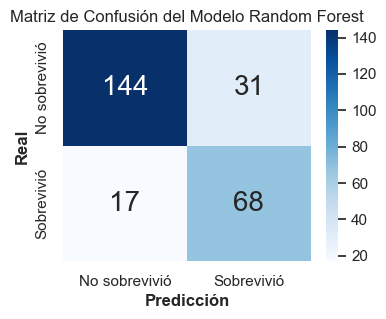

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No sobrevivió', 'Sobrevivió'],
            yticklabels=['No sobrevivió', 'Sobrevivió'],
            annot_kws={"size": 20})

plt.ylabel('Real', fontweight='bold')
plt.xlabel('Predicción', fontweight='bold')
plt.title('Matriz de Confusión del Modelo Random Forest')
plt.show()